# Importing packages

In [ ]:
import json
from PIL import Image
import os

# Loading the annotations

In [ ]:
# Load the JSON file
with open(r'd:\modified_annotations.json', 'r') as f:
    data = json.load(f)

# Specify the image directory
image_dir = r'D:\images'

# 1. Check all annotations

In [2]:
# Iterate over all annotations
for annotation in data['annotations']:
    print(f"Annotation ID: {annotation['id']}")
    print(f"Image ID: {annotation['image_id']}")
    print(f"Category ID: {annotation['category_id']}")
    print(f"Segmentation: {annotation['segmentation']}")
    print(f"Area: {annotation['area']}")
    print(f"Bbox: {annotation['bbox']}")
    print(f"Isegmentation: {annotation['segmentation']}")
    print(f"Iscrowd: {annotation['iscrowd']}")
    print("\n")


Annotation ID: 0
Image ID: 0
Category ID: 24
Segmentation: [[84.682, 365.781, 152.428, 299.003, 257.036, 211.296, 356.663, 151.495, 404.483, 136.545, 448.319, 143.522, 496.982, 164.682, 523.039, 193.355, 601.743, 281.063, 670.486, 364.784, 265.006, 462.458]]
Area: 190921.139
Bbox: [85, 137, 585.804, 325.913]
Isegmentation: [[84.682, 365.781, 152.428, 299.003, 257.036, 211.296, 356.663, 151.495, 404.483, 136.545, 448.319, 143.522, 496.982, 164.682, 523.039, 193.355, 601.743, 281.063, 670.486, 364.784, 265.006, 462.458]]
Iscrowd: 0


Annotation ID: 1
Image ID: 1
Category ID: 12
Segmentation: [[242.792, 235.446, 281.82, 347.832, 300.433, 356.631, 383.528, 347.76, 471.657, 331.854, 460.359, 279.371, 379.932, 13.268, 346.807, 12.111, 342.453, 12.212, 295.011, 14.162, 214.612, 51.325, 202.23, 68.396, 213.451, 126.517, 242.792, 235.446]]
Area: 92822.99
Bbox: [202, 12, 269.427, 344.52]
Isegmentation: [[242.792, 235.446, 281.82, 347.832, 300.433, 356.631, 383.528, 347.76, 471.657, 331.854, 460

# 2. Check all labels

In [22]:
from collections import defaultdict

# Create a dictionary to store the count of occurrences for each category
category_count = defaultdict(int)

# Create a mapping of category ID to category name
category_id_to_name = {category['id']: category['name'] for category in data['categories']}

# Count the occurrences of each category in the annotations
for annotation in data['annotations']:
    category_id = annotation['category_id']
    category_name = category_id_to_name.get(category_id, "Unknown")
    category_count[category_name] += 1

# Get all unique category names and sort them
category_names = sorted(category_count.keys())

# Print the category names in alphabetical order along with their occurrences
print("Available labels (sorted alphabetically) with occurrences:")
for category_name in category_names:
    print(f"{category_name}: {category_count[category_name]}")

# Print the total number of unique labels and annotations detected
print(f"\nTotal unique labels detected: {len(category_names)}")
print(f"Total annotations detected: {len(data['annotations'])}")


Available labels (sorted alphabetically) with occurrences:
Alloy-Rim_Front-Left-Side: 100
Alloy-Rim_Front-Right-Side: 100
Alloy-Rim_Rear-Left-Side: 111
Alloy-Rim_Rear-Right-Side: 101
Antenna: 91
Arch-Panel_Front-Left-Side: 95
Arch-Panel_Front-Right-Side: 107
Arch-Panel_Rear-Left-Side: 104
Arch-Panel_Rear-Right-Side: 105
Brake-Light: 64
Bumper_Front-Side: 109
Bumper_Rear-Side: 108
Door_Front-Left-Side: 111
Door_Front-Right-Side: 107
Door_Rear-Left-Side: 108
Door_Rear-Right-Side: 94
Exterior-Door-Handle_Front-Left-Side: 104
Exterior-Door-Handle_Front-Right-Side: 101
Exterior-Door-Handle_Rear-Left-Side: 100
Exterior-Door-Handle_Rear-Right-Side: 91
Fender_Left-Side: 136
Fender_Right-Side: 132
Fog-Light_Front-Left-Side: 38
Fog-Light_Front-Right-Side: 40
Fog-Light_Rear-Left-Side: 12
Fog-Light_Rear-Right-Side: 12
Fuel-Cap: 93
Grille: 168
Head-Light_Left-Side: 127
Head-Light_Right-Side: 137
Hood: 169
Indicator-Light_Left-Side: 30
Indicator-Light_Right-Side: 25
License-Plate: 186
Logo_Front-Sid

# 3. Searching Labels

Images containing 'Wheel' (showing results 1 to 2 of 226):

Image ID: 1
File Name: pic1.jpg
Labels: Wheel_Rear-Right-Side, Wheel_Front-Right-Side


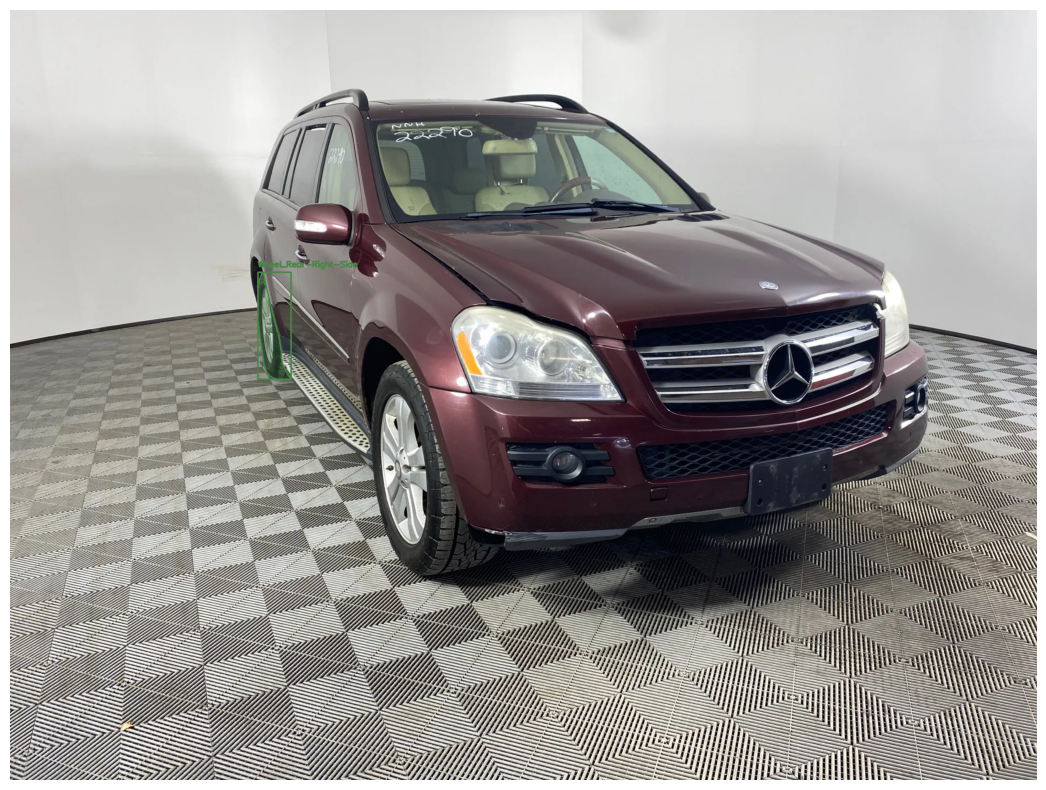




Image ID: 2
File Name: pic10.jpg
Labels: Wheel_Front-Right-Side, Wheel_Rear-Right-Side


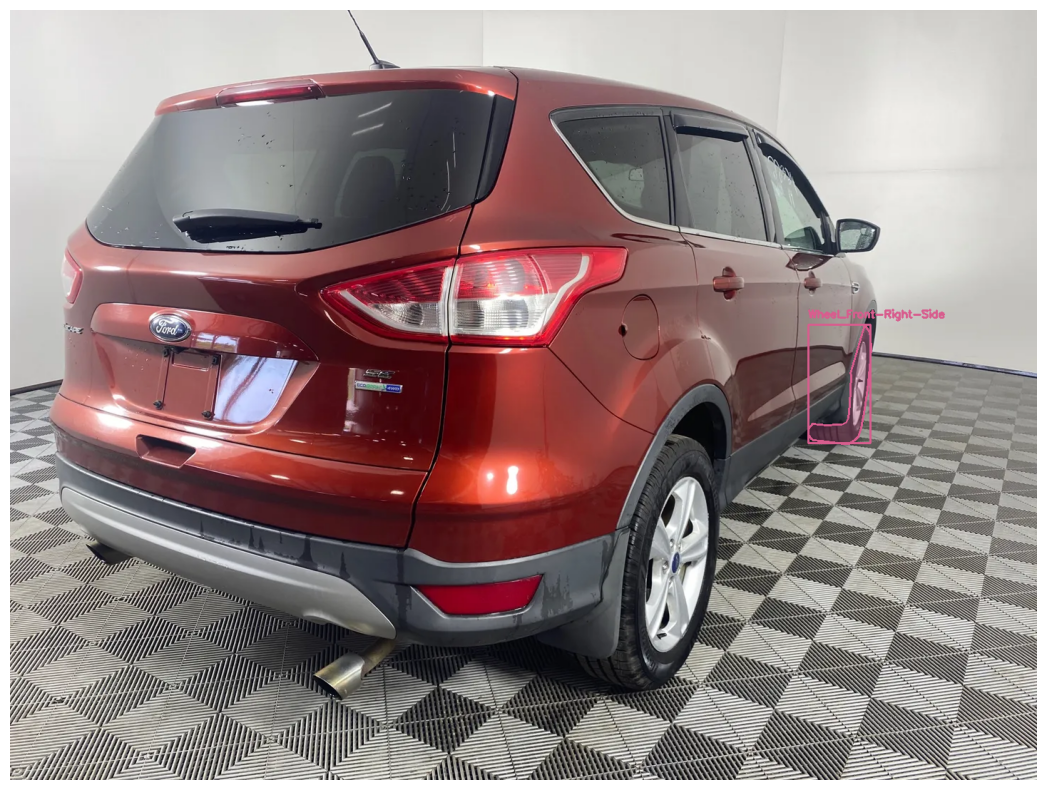




Showing 2 of 226 total images found with label 'Wheel'


In [ ]:
import json
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import random
from PIL import Image

class COCOSearchVisualizer:
    def __init__(self, data, image_dir):
        """Initialize as before"""
        self.images_dir = Path(image_dir)
        self.coco_data = data
        self.cat_id_to_name = {cat['id']: cat['name'] for cat in self.coco_data['categories']}
        self.filename_to_info = {img['file_name']: img for img in self.coco_data.get('images', [])}
        
        random.seed(42)
        self.category_colors = {
            cat_id: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            for cat_id in self.cat_id_to_name.keys()
        }

    def draw_bbox(self, image, bbox, color):
        """Draw bounding box (unchanged)"""
        x, y, w, h = [int(coord) for coord in bbox]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        return image

    def draw_segmentation(self, image, segmentation, color):
        """Draw segmentation (unchanged)"""
        for segment in segmentation:
            points = np.array(segment).reshape(-1, 2).astype(np.int32)
            cv2.polylines(image, [points], True, color, 2)
            overlay = image.copy()
            cv2.fillPoly(overlay, [points], color)
            cv2.addWeighted(overlay, 0.3, image, 0.7, 0, image)
        return image

    def search_and_visualize(self, search_label, view_image=False, show_bbox=True, 
                        show_segmentation=True, show_labels=True, show_only_searched=False,
                        figsize=(15, 10), start_idx=None, end_idx=None, strict=False):
        """
        Search for images containing specific labels and visualize them with annotations
        
        Args:
            search_label (str): Label to search for
            view_image (bool): Whether to display the images
            show_bbox (bool): Whether to show bounding boxes
            show_segmentation (bool): Whether to show segmentation masks
            show_labels (bool): Whether to show category labels
            show_only_searched (bool): Whether to show only the searched labels
            figsize (tuple): Figure size for displayed images
            start_idx (int): Starting index for results (1-based)
            end_idx (int): Ending index for results (inclusive)
            strict (bool): If True, matches exact label only
        """
        result_images = {}
        search_label_lower = search_label.lower()
        
        # First, identify all category IDs that match the search term
        matching_category_ids = set()
        for cat_id, cat_name in self.cat_id_to_name.items():
            if strict:
                if cat_name.lower() == search_label_lower:
                    matching_category_ids.add(cat_id)
            else:
                if search_label_lower in cat_name.lower():
                    matching_category_ids.add(cat_id)
        
        # Find matching images
        for annotation in self.coco_data['annotations']:
            category_id = annotation['category_id']
            
            if category_id in matching_category_ids:
                category_name = self.cat_id_to_name[category_id]
                image_id = annotation['image_id']
                file_name = next(
                    (img['file_name'] for img in self.coco_data['images'] if img['id'] == image_id),
                    "Unknown"
                )

                if image_id in result_images:
                    if category_name not in result_images[image_id]['labels']:
                        result_images[image_id]['labels'].append(category_name)
                    result_images[image_id]['search_category_ids'].add(category_id)
                else:
                    result_images[image_id] = {
                        'file_name': file_name, 
                        'labels': [category_name],
                        'search_category_ids': {category_id}
                    }

        # Convert to list for easier slicing
        result_items = list(result_images.items())
        total_results = len(result_items)

        # Adjust indices
        if start_idx is not None:
            start_idx = max(1, min(start_idx, total_results)) - 1  # Convert to 0-based
        else:
            start_idx = 0

        if end_idx is not None:
            end_idx = min(end_idx, total_results)  # Keep within bounds
        else:
            end_idx = total_results

        # Slice results
        result_items = result_items[start_idx:end_idx]

        # Display results
        if result_items:
            print(f"Images containing '{search_label}' (showing results {start_idx + 1} to {min(end_idx, total_results)} of {total_results}):")
            
            for image_id, info in result_items:
                print(f"\nImage ID: {image_id}")
                print(f"File Name: {info['file_name']}")
                print(f"Labels: {', '.join(info['labels'])}")
                
                if view_image:
                    try:
                        image = self.visualize_image_by_filename(
                            info['file_name'],
                            show_bbox=show_bbox,
                            show_segmentation=show_segmentation,
                            show_labels=show_labels,
                            show_only_searched=show_only_searched,
                            search_category_ids=info.get('search_category_ids', set())
                        )
                        
                        plt.figure(figsize=figsize)
                        plt.imshow(image)
                        plt.axis('off')
                        plt.show()
                        print("\n")
                    except Exception as e:
                        print(f"Error displaying image {info['file_name']}: {str(e)}\n")
            
            print(f"\nShowing {len(result_items)} of {total_results} total images found with label '{search_label}'")
        else:
            print(f"No images found with label '{search_label}'")

    def visualize_image_by_filename(self, filename, show_bbox=True, 
                                  show_segmentation=True, show_labels=True,
                                  show_only_searched=False, search_category_ids=None):
        """Visualize method (unchanged)"""
        if filename not in self.filename_to_info:
            raise ValueError(f"Image {filename} not found in annotations")
            
        image_info = self.filename_to_info[filename]
        image_path = self.images_dir / filename
        
        if not image_path.exists():
            raise ValueError(f"Image file not found: {image_path}")
            
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        annotations = [
            ann for ann in self.coco_data['annotations']
            if ann['image_id'] == image_info['id']
        ]
        
        for ann in annotations:
            category_id = ann['category_id']
            
            if show_only_searched and category_id not in search_category_ids:
                continue
                
            color = self.category_colors[category_id]
            
            if show_segmentation and 'segmentation' in ann:
                image = self.draw_segmentation(image, ann['segmentation'], color)
            
            if show_bbox and 'bbox' in ann:
                image = self.draw_bbox(image, ann['bbox'], color)
            
            if show_labels and 'bbox' in ann:
                x, y = ann['bbox'][:2]
                label = self.cat_id_to_name[category_id]
                cv2.putText(image, label, (int(x), int(y) - 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
        return image

# Initialize the visualizer with loaded data
visualizer = COCOSearchVisualizer(data, image_dir)

# Example usage with all new features:
visualizer.search_and_visualize('left', 
                              view_image=True,
                              show_bbox=True,
                              show_segmentation=True,
                              show_labels=True,
                              show_only_searched=True,
                              start_idx=1,     # Start from first result
                              end_idx=311,       # Show up to 5 results
                              strict=False)     # Exact match only

# 4. Remove complete annotations from a set (e.g., [car, dog])

In [20]:
categories_to_remove = ["Driver_power_seat", "Passenger_power_seat"]  # Replace with the actual category names or IDs to remove
category_ids_to_remove = [cat['id'] for cat in data['categories'] if cat['name'] in categories_to_remove]

# Filter out annotations with the given category IDs
data['annotations'] = [annotation for annotation in data['annotations'] if annotation['category_id'] not in category_ids_to_remove]

# Save the modified annotations
with open('modified_annotations.json', 'w') as f:
    json.dump(data, f)

# 5. Merge annotations (e.g., [car_wheel, car wheel, car wheels])

In [11]:
annotations_to_merge = ['Steering wheel', 'Steering_wheel']  # Replace with actual annotation names to merge
merged_category_name = 'Steering wheel'  # Name for the merged category

# Get the category ID of the merged category
merged_category_id = None
for cat in data['categories']:
    if cat['name'] == merged_category_name:
        merged_category_id = cat['id']
        break

if merged_category_id is None:
    print(f"Category '{merged_category_name}' not found.")
else:
    # Get IDs of categories to merge
    category_ids_to_merge = [cat['id'] for cat in data['categories'] if cat['name'] in annotations_to_merge]

    # Replace category IDs in annotations
    for annotation in data['annotations']:
        if annotation['category_id'] in category_ids_to_merge:
            annotation['category_id'] = merged_category_id

    # Remove merged categories from the categories list, keeping only the merged one
    data['categories'] = [cat for cat in data['categories'] if cat['id'] == merged_category_id or cat['name'] not in annotations_to_merge]

    # Save the modified data
    with open('merged_annotations.json', 'w') as f:
        json.dump(data, f)


# 6. Renaming Labels

In [9]:
def rename_categories(data, rename_mapping):
    # Iterate over the categories and rename them based on the mapping
    for category in data['categories']:
        if category['name'] in rename_mapping:
            old_name = category['name']
            category['name'] = rename_mapping[old_name]
            print(f"Renamed category '{old_name}' to '{category['name']}'")
    
    # Return the modified data
    return data

# Define the mapping of old category names to new names
rename_mapping = {
    'Alloy_Rim_Back_Leftside': 'Alloy-Rim_Rear-Left-Side',
    'Alloy_Rim_Back_Rightside': 'Alloy-Rim_Rear-Right-Side',
}

# Rename the categories in the data
data = rename_categories(data, rename_mapping)

# Save the modified data to a JSON file later, you can do so:
with open('modified_annotations.json', 'w') as f:
    json.dump(data, f)


Renamed category 'Fog-Light_Front_Rightside' to 'Fog-Light_Front-Right-Side'
Renamed category 'Fog-Light_Front_Leftside' to 'Fog-Light_Front-Left-Side'

